## Classification Problem - Adult Dataset

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [73]:
df = pd.read_csv('//Users//edenshrian//Desktop//Documents// Eden Shrian//Eden//Others//data.csv')

In [74]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Define function that removes the spaces from the beginning of any cell in the dataframe

In [75]:
def remove_spaces(df):
    for col in df:
        df[col] = df[col].astype(str).str.lstrip()
    return df

df = remove_spaces(df)

In [76]:
df['>50K'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [77]:
print(df['>50K'].value_counts())
print(df['native-country'].value_counts())

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: >50K, dtype: int64
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua  

In [78]:
#Replace the target variable from string to binary variable
df['>50K'] = df['>50K'].replace(['<=50K.','>50K.','<=50K','>50K'],[0,1,0,1])
df['sex'] = df['sex'].replace(['Male','Female'],[0,1])

#Replace native_country variable to from_usa because of the most of observations from USA. 
df['from_usa'] = df['native-country'].replace('United-States',1)  
list_of_countries = ['Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South','Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran','Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia','Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal','Dominican-Republic', 'El-Salvador', 'France', 'Guatemala','China', 'Japan', 'Yugoslavia', 'Peru','Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago','Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary','Holand-Netherlands']
df['from_usa'] = df['from_usa'].replace(list_of_countries,[0 for i in range(len(list_of_countries))])

#Because age is unique variable, we would prefer to replace the age for a range of ages.
df['age'] = df['age'].astype(int)
df['age'] = pd.cut(df['age'], bins = [17,30,50,90],labels = ['younger_adult','mid_adult','adult'])

In [79]:
plt.rcParams['figure.figsize'] = [16, 9]

mid_adult        0.647985
adult            0.267049
younger_adult    0.084966
Name: age, dtype: float64

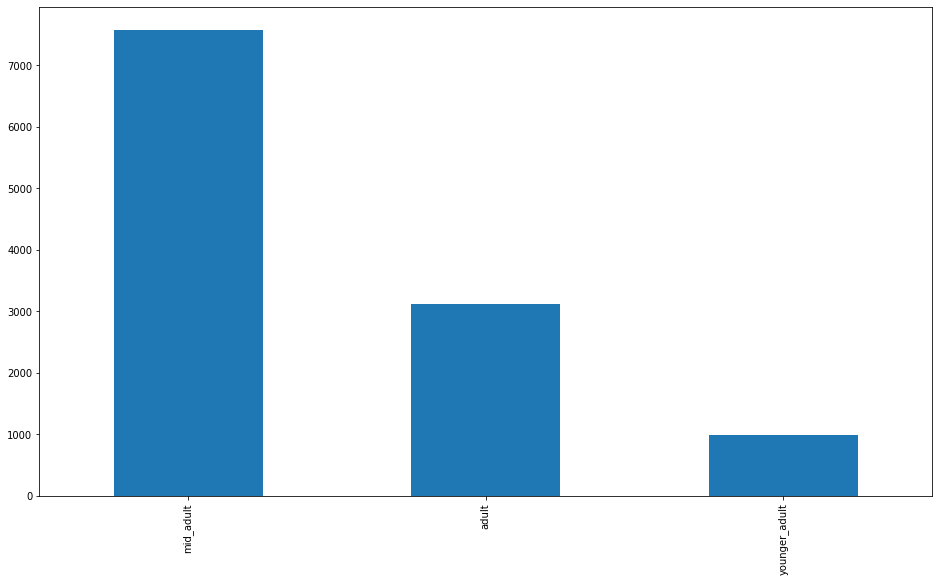

In [80]:
# The distribution of the three levels of age to earn more than 50K.
over_50k = df[df['>50K'] == 1] 
over_50k['age'].value_counts().plot(kind = 'bar')
over_50k['age'].value_counts(normalize=True)

Exec-managerial      0.248823
Prof-specialty       0.238213
Sales                0.126209
Craft-repair         0.118337
Adm-clerical         0.065714
Transport-moving     0.041157
Tech-support         0.035937
Machine-op-inspct    0.031830
Protective-serv      0.026354
?                    0.022675
Other-service        0.017455
Farming-fishing      0.014803
Handlers-cleaners    0.011808
Armed-Forces         0.000428
Priv-house-serv      0.000257
Name: occupation, dtype: float64

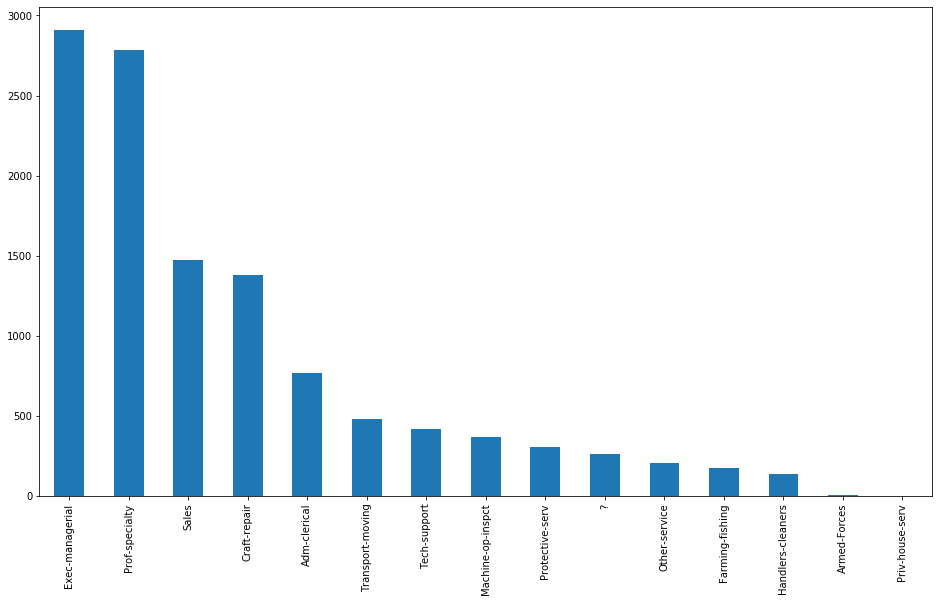

In [81]:
# By occupation
over_50k['occupation'].value_counts().plot(kind = 'bar')
over_50k['occupation'].value_counts(normalize=True)

In [82]:
# The most of the observation are 0 therefore we would rather to drop them.
print(df['capital-loss'].value_counts()[0])
print(df['capital-gain'].value_counts()[0])

46560
44807


In [83]:
# Same as education
df.drop('education-num',inplace=True,axis=1)

# low corr between 'hours-per-week' and 'fnlwgt' with the target variable
df.drop('hours-per-week',inplace=True,axis=1)
df.drop('fnlwgt',inplace=True,axis=1)

# most of observations are 0
df.drop('capital-loss',inplace=True,axis=1)
df.drop('capital-gain', inplace = True,axis =1)

#Has changed to from_usa
df.drop('native-country',inplace=True,axis=1)

In [84]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,>50K,from_usa
0,mid_adult,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,0,0,1
1,mid_adult,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,0,0,1
2,mid_adult,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,0,0,1
3,adult,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,1
4,younger_adult,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0
...,...,...,...,...,...,...,...,...,...,...
48837,mid_adult,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,1,0,1
48838,adult,?,HS-grad,Widowed,?,Other-relative,Black,0,0,1
48839,mid_adult,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,0,0,1
48840,mid_adult,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,0,0,1


In [85]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
>50K                 0
from_usa             0
dtype: int64

In [86]:
#Dropping rows that has ?.
def drop_irrelevant(df):
    df['workclass'] = df['workclass'].replace('?',np.nan)
    df['occupation'] = df['occupation'].replace('?',np.nan)
    df = df.dropna()
    
    return df 

df = drop_irrelevant(df)

In [87]:
#Categorical feature
education_values = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Some-college','Bachelors','Masters','Doctorate']
categorical_values = [*range(len(education_values))]
df['education'] = df['education'].replace(education_values,categorical_values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    0.749171
1    0.250829
Name: >50K, dtype: float64

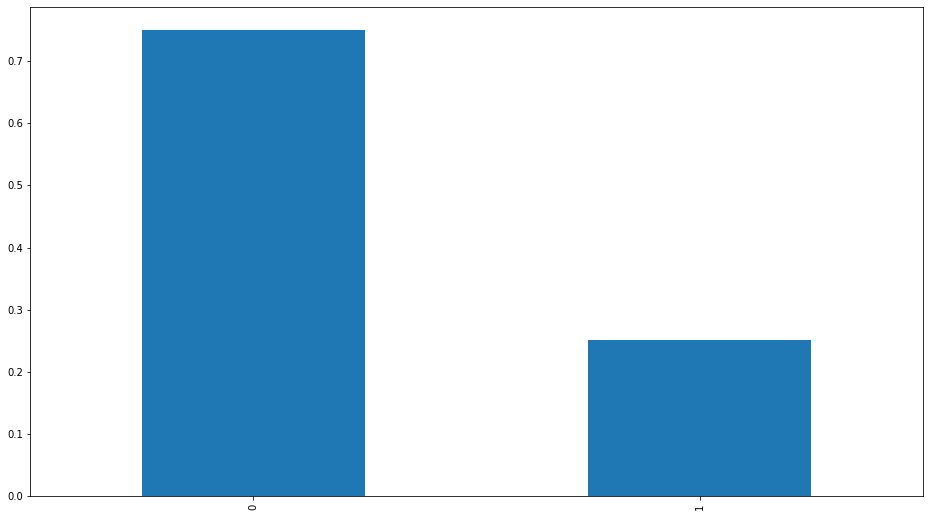

In [88]:
#Proportion of the target variable
df['>50K'].value_counts(normalize=True).plot(kind='bar')
df['>50K'].value_counts(normalize=True)

In [91]:
df = pd.get_dummies(df)

In [20]:
corr = pd.Series(df.corrwith(df['>50K']).sort_values())
df.drop(corr[(corr<0.1) & (corr>(-0.1))].index,inplace=True,axis=1)

In [21]:
df

,education,sex,>50K,age_younger_adult,age_mid_adult,workclass_Private,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,13,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,13,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
2,8,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
3,6,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,13,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,13,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0
48837,13,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0
48839,13,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0
48840,13,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0


## Train and test split

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop('>50K',axis=1)
y = df['>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=False)

In [24]:
#Checking the propotions of the Y train and Y test.
print(y_train.sum()/y_train.count())
print(y_test.sum()/y_test.count())

0.25149332396345747
0.24883618796662274


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Performance metrics  - cross validation

Using the default option

In [26]:
def performance_metrics(list_of_algorithms,measurment,list_names):
    
    scores = []
    for i in range(len(list_of_algorithms)):
        model = list_of_algorithms[i]
        cv  = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        score = cross_val_score(model, X, y, scoring=measurment , cv=cv, n_jobs=-1)
        scores.append(score)
        
    scores = [np.mean(score[i]) for i in range(len(scores))]
    dataframe = pd.DataFrame(scores , index=list_names,columns = [measurment])
    dataframe = dataframe.sort_values(by=[measurment],ascending=False)
    
        
    return dataframe

algorithms for classification

In [29]:
knn_classifier = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier()
logistic_regression = LogisticRegression()
list_of_algorithms = [knn_classifier,decision_tree,ada_boost,logistic_regression]
list_names = ['knn_classifier','decision_tree','ada boost','logistic_regression']

## Accuracy

In [30]:
performance_metrics(list_of_algorithms,'accuracy',list_names)

,accuracy
knn_classifier,0.826087
ada boost,0.820378
decision_tree,0.819060
logistic_regression,0.815986


## Precision

In [31]:
performance_metrics(list_of_algorithms,'precision',list_names)

,precision
knn_classifier,0.678571
decision_tree,0.663918
ada boost,0.662651
logistic_regression,0.654158


## Recall

In [32]:
performance_metrics(list_of_algorithms,'recall',list_names)

,recall
knn_classifier,0.582312
ada boost,0.577933
logistic_regression,0.564799
decision_tree,0.563923


## F1 

In [33]:
performance_metrics(list_of_algorithms,'f1',list_names)

,f1
knn_classifier,0.626767
ada boost,0.617399
decision_tree,0.609848
logistic_regression,0.606203


Before finding the optimal hyperparameters it looks that knn classifier will be the best algorithm for this dataset

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## Finding the optimal hyperparameters using GridSearch CV

## Decision Tree

In [35]:
decision_tree = DecisionTreeClassifier(random_state=1)
min_split = list(range(2,11))
min_leaf = list(range(1,11))
max_depth = list(range(3,11))
params = {
    'min_samples_split': min_split, 
    'min_samples_leaf':min_leaf,
    'max_depth':max_depth
}
tree_cv = GridSearchCV(decision_tree, param_grid=params, n_jobs=-1,cv=5)
tree_cv.fit(X_train,y_train)
print("\nBest parameters for Decision Tree Algorithm : {}\n".format(tree_cv.best_params_))


Best parameters for Decision Tree Algorithm : {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}



In [36]:
decision_tree_optimal = DecisionTreeClassifier(max_depth=tree_cv.best_params_['max_depth'], min_samples_leaf=tree_cv.best_params_['min_samples_leaf'],
                          min_samples_split=tree_cv.best_params_['min_samples_split'])


decision_tree_optimal.fit(X_train, y_train)

#Get predicted probabilites from the model
y_probabilities = decision_tree_optimal.predict_proba(X_test)[:,1]
y_train_pred = decision_tree_optimal.predict(X_train)
y_test_pred = decision_tree_optimal.predict(X_test)

#Accuracy scores 
tree_test_accuracy = accuracy_score(y_test, y_test_pred)
print('DecisionTree test_set accuracy score: {0:0.3f}'.format(tree_test_accuracy))

#Recall scores 
tree_test_recall = recall_score(y_test, y_test_pred)
print('DecisionTree test_set recall score: {0:0.3f}'.format(tree_test_recall))

#Precision scores 
tree_test_precision = precision_score(y_test, y_test_pred)
print('DecisionTree test_set precision score: {0:0.3f}'.format(tree_test_precision))

#f1 score
tree_test_f1 = f1_score(y_test,y_test_pred)
print('DecisionTree test_set f1 score: {0:0.3f}'.format(tree_test_f1))


#Create true and false positive rates
FP_rate_tree,TP_rate_tree,threshold_knn = roc_curve(y_test,y_probabilities)
ROC_score = roc_auc_score(y_test, y_probabilities)
print('ROC score for DecisionTree', tree_cv.best_params_, ': {0:0.3f}'.format(ROC_score))

DecisionTree test_set accuracy score: 0.823
DecisionTree test_set recall score: 0.520
DecisionTree test_set precision score: 0.691
DecisionTree test_set f1 score: 0.593
ROC score for DecisionTree {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2} : 0.868


**ROC plot - decision tree**

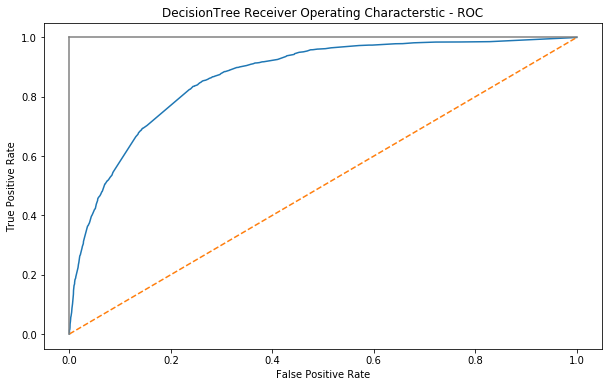

In [37]:
plt.figure(figsize=(10,6))
plt.title('DecisionTree Receiver Operating Characterstic - ROC')
plt.plot(FP_rate_tree,TP_rate_tree)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Confusion metrix - decision tree**

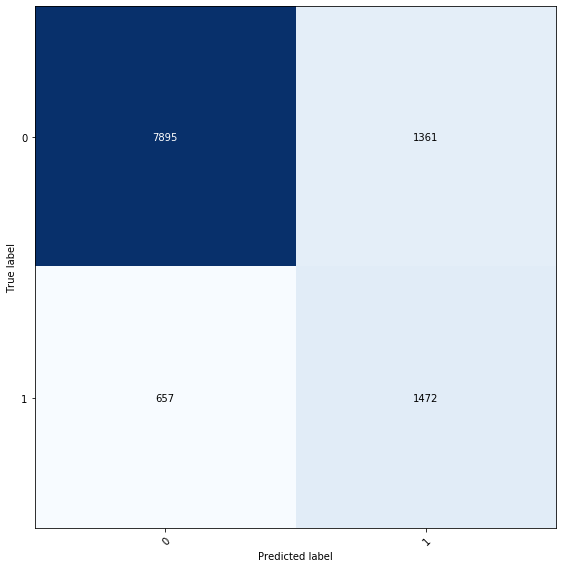

In [53]:
decision_tree = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 7,min_samples_split= 2)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
class_names = np.array([0,1])
disp = plot_confusion_matrix(y_pred, y_test, class_names,
                                 cmap=plt.cm.Blues)

## Logistic Regression

In [54]:
logistic = LogisticRegression(random_state=1,max_iter=1000)
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
params = {
    'C': C, 
    'penalty':penalty,
    'solver':solver
}

logistic_cv = GridSearchCV(logistic, param_grid=params, n_jobs=-1,cv=5)
logistic_cv.fit(X_train,y_train)
print("\nBest parameters for LogisticRegression : {}\n".format(logistic_cv.best_params_))


Best parameters for LogisticRegression : {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}



In [55]:
logistic_optimal = LogisticRegression(C=logistic_cv.best_params_['C'], penalty=logistic_cv.best_params_['penalty'],
                          solver=logistic_cv.best_params_['solver'],random_state=1,max_iter=1000)


logistic_optimal.fit(X_train, y_train)
#Get predicted probabilites from the model

y_probabilities = logistic_optimal.predict_proba(X_test)[:,1]
y_train_pred = logistic_optimal.predict(X_train)
y_test_pred = logistic_optimal.predict(X_test)

#Accuracy scores for best model 
logistic_test_accuracy = accuracy_score(y_test, y_test_pred)
print('Logistic Regression test_set accuracy score: {0:0.3f}'.format(logistic_test_accuracy))

#Recall scores for best model 
logistic_test_recall = recall_score(y_test, y_test_pred)
print('Logistic Regression test_set recall score: {0:0.3f}'.format(logistic_test_recall))

#Precision scores 
logistic_test_precision = precision_score(y_test, y_test_pred)
print('Logistic test_set precision score: {0:0.3f}'.format(logistic_test_precision))

#f1 score
logistic_test_f1 = f1_score(y_test,y_test_pred)
print('Logistic test_set f1 score: {0:0.3f}'.format(logistic_test_f1))




#Create true and false positive rates
FP_rate_logistic,TP_rate_logistic,threshold_knn = roc_curve(y_test,y_probabilities)
ROC_score = roc_auc_score(y_test, y_probabilities)
print('ROC score for Logistic Regression', logistic_cv.best_params_, ': {0:0.3f}'.format(ROC_score))

Logistic Regression test_set accuracy score: 0.825
Logistic Regression test_set recall score: 0.577
Logistic test_set precision score: 0.673
Logistic test_set f1 score: 0.621
ROC score for Logistic Regression {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'} : 0.871


**ROC plot - logistic regression**

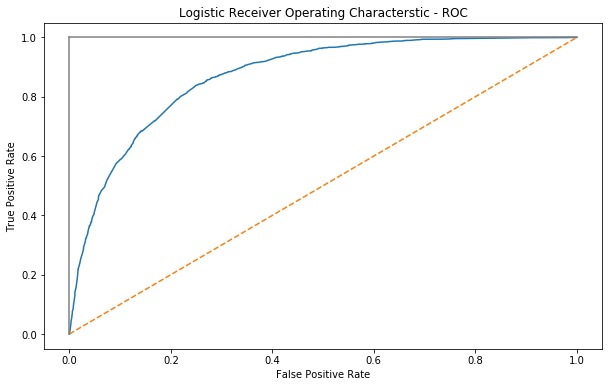

In [56]:
plt.figure(figsize=(10,6))
plt.title('Logistic Receiver Operating Characterstic - ROC')
plt.plot(FP_rate_logistic,TP_rate_logistic)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Confusion metrix - decision tree**

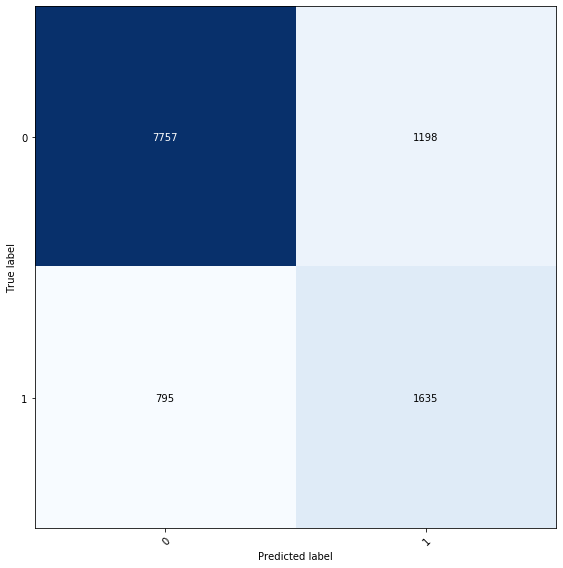

In [57]:
logistic = LogisticRegression(C= 1.0, penalty ='l1', solver = 'saga',max_iter = 1000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
disp = plot_confusion_matrix(y_pred, y_test, class_names,
                                 cmap=plt.cm.Blues)

## KNN neighbors classifier

In [58]:
knn =KNeighborsClassifier()
neighbors = list(range(1,20))

params = {
    'n_neighbors':neighbors,
    'p':[1, 2]
         }
knn_cv = GridSearchCV(knn,params,cv=5, n_jobs=-1)
knn_cv.fit(X_train, y_train)
print("\nBest parameters for KNN classifier: {}\n".format(knn_cv.best_params_))


Best parameters for KNN classifier: {'n_neighbors': 19, 'p': 2}



In [59]:
# We will use the parameters we got from CV optimization
knn_optimal = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'], p=knn_cv.best_params_['p'])
knn_optimal.fit(X_train, y_train)

#Get predicted probabilites from the model
y_probabilities = knn_optimal.predict_proba(X_test)[:,1]
y_train_pred = knn_optimal.predict(X_train)
y_test_pred = knn_optimal.predict(X_test)

#Accuracy scores for best model 
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
print('KNN test_set accuracy score: {0:0.3f}'.format(knn_test_accuracy))

#Recall scores for best model 
knn_test_recall = recall_score(y_test, y_test_pred)
print('KNN test_set recall score: {0:0.3f}'.format(knn_test_recall))


#Precision scores 
knn_test_precision = precision_score(y_test, y_test_pred)
print('KNN test_set precision score: {0:0.3f}'.format(knn_test_precision))

#f1 score
knn_test_f1 = f1_score(y_test,y_test_pred)
print('KNN test_set f1 score: {0:0.3f}'.format(knn_test_f1))

#Create true and false positive rates
FP_rate_knn,TP_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)
ROC_score_knn = roc_auc_score(y_test, y_probabilities)
print('ROC score for knn with CV configured for', knn_cv.best_params_, ': {0:0.3f}'.format(ROC_score_knn))

KNN test_set accuracy score: 0.815
KNN test_set recall score: 0.595
KNN test_set precision score: 0.637
KNN test_set f1 score: 0.615
ROC score for knn with CV configured for {'n_neighbors': 19, 'p': 2} : 0.863


**ROC plot - knn**

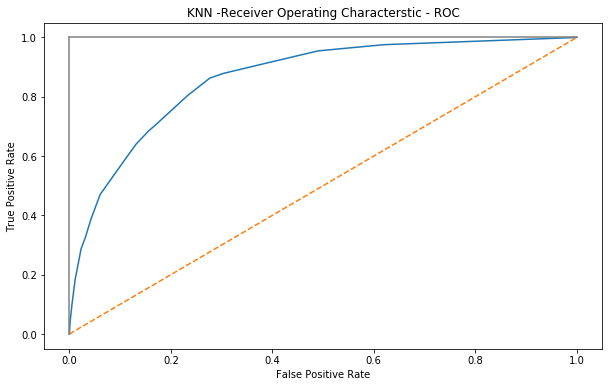

In [60]:
plt.figure(figsize=(10,6))
plt.title('KNN -Receiver Operating Characterstic - ROC')
plt.plot(FP_rate_knn,TP_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Confusion metrix - KNN**

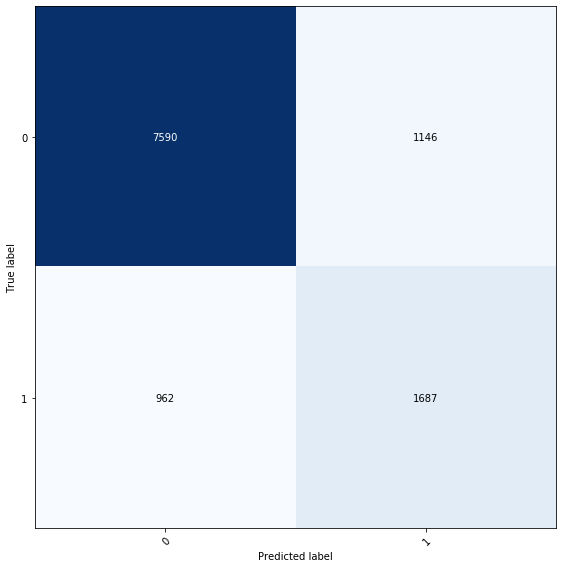

In [61]:
knn = KNeighborsClassifier(n_neighbors= 19, p= 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
disp = plot_confusion_matrix(y_pred, y_test, class_names,
                                 cmap=plt.cm.Blues)

## AdaBoost

In [62]:
ada =AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
learning_rate = [.001,0.01,.1]
n_estimators = [500,1000,2000]
params = {
    'learning_rate':learning_rate,
    'n_estimators':n_estimators
         }
ada_cv = GridSearchCV(ada,params,cv=5, n_jobs=-1)
ada_cv.fit(X_train, y_train)
print("\nBest parameters for AdaBoost classifier: {}\n".format(ada_cv.best_params_))


Best parameters for AdaBoost classifier: {'learning_rate': 0.1, 'n_estimators': 500}



In [65]:
Ada_boost_optimal = AdaBoostClassifier(learning_rate= ada_cv.best_params_['learning_rate'],n_estimators=ada_cv.best_params_['n_estimators'])


Ada_boost_optimal.fit(X_train, y_train)
#Get predicted probabilites from the model
y_probabilities = Ada_boost_optimal.predict_proba(X_test)[:,1]
y_train_pred = Ada_boost_optimal.predict(X_train)
y_test_pred = Ada_boost_optimal.predict(X_test)

#Accuracy scores for best model 
ada_test_accuracy = accuracy_score(y_test, y_test_pred)
print('AdaBoost test_set accuracy score: {0:0.3f}'.format(ada_test_accuracy))

#Recall scores for best model 
ada_test_recall = recall_score(y_test, y_test_pred)
print('AdaBoost test_set recall score: {0:0.3f}'.format(ada_test_recall))


#Precision scores 
ada_test_precision = precision_score(y_test, y_test_pred)
print('AdaBoost test_set precision score: {0:0.3f}'.format(ada_test_precision))

#f1 score
ada_test_f1 = f1_score(y_test,y_test_pred)
print('AdaBoost test_set f1 score: {0:0.3f}'.format(ada_test_f1))

#Create true and false positive rates
FP_rate_ada,TP_rate_ada,threshold_knn = roc_curve(y_test,y_probabilities)
ROC_score = roc_auc_score(y_test, y_probabilities)
print('ROC score for AdaBoost :', ada_cv.best_params_, ': {0:0.3f}'.format(ROC_score))

AdaBoost test_set accuracy score: 0.826
AdaBoost test_set recall score: 0.511
AdaBoost test_set precision score: 0.709
AdaBoost test_set f1 score: 0.594
ROC score for AdaBoost : {'learning_rate': 0.1, 'n_estimators': 500} : 0.875


**ROC plot - adaboost**

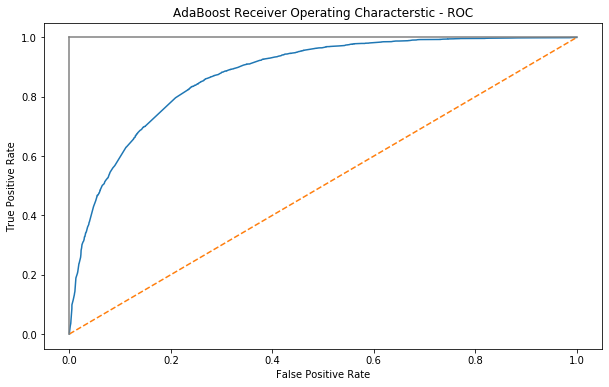

In [66]:
plt.figure(figsize=(10,6))
plt.title('AdaBoost Receiver Operating Characterstic - ROC')
plt.plot(FP_rate_ada,TP_rate_ada)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Confusion metrix - adaboost**

Text(0.5, 1, 'Confusion Metrix for AdaBoost')

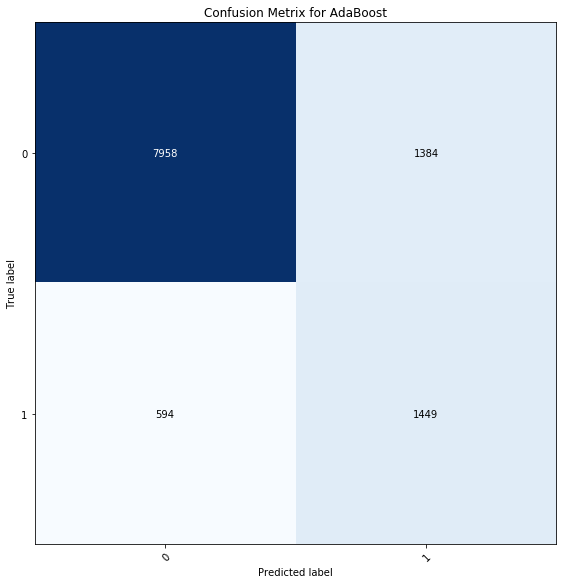

In [67]:
ada = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 500)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
disp = plot_confusion_matrix(y_pred, y_test, class_names,
                                 cmap=plt.cm.Blues)
plt.title('Confusion Metrix for AdaBoost')

## Summarize all metrics

In [68]:
dataframe = pd.DataFrame(index = list_names)
dataframe['accuracy'] = [knn_test_accuracy,tree_test_accuracy,ada_test_accuracy,logistic_test_accuracy]
dataframe['recall'] = [knn_test_recall,tree_test_recall,ada_test_recall,logistic_test_recall]
dataframe['precision'] =[knn_test_precision,tree_test_precision,ada_test_precision,logistic_test_precision]
dataframe['f1'] = [knn_test_f1,tree_test_f1,ada_test_f1,logistic_test_f1]

Choosing F1 as the most important metric for this problem.
accuracy can be mislead becuase of the distribution of target variable. (75% are zeros)

In [69]:
dataframe = dataframe.sort_values('f1',ascending=False)

In [70]:
dataframe

,accuracy,recall,precision,f1
logistic_regression,0.824945,0.577127,0.672840,0.621319
knn_classifier,0.814844,0.595482,0.636844,0.615469
ada boost,0.826263,0.511472,0.709251,0.594340
decision_tree,0.822749,0.519591,0.691404,0.593309


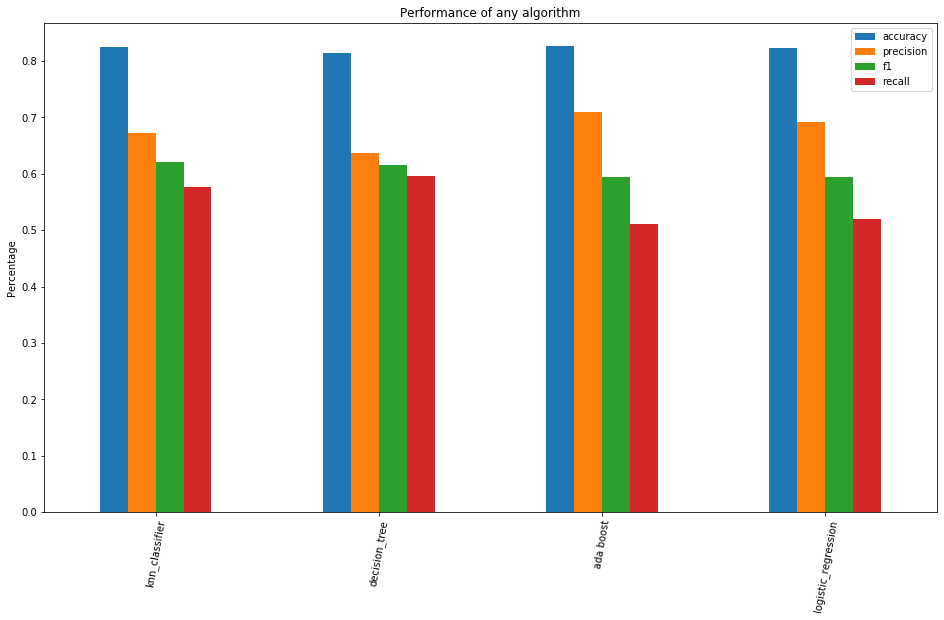

In [71]:
accuracy = dataframe['accuracy'].values.tolist()
recall = dataframe['recall'].values.tolist()
precision = dataframe['precision'].values.tolist()
f1 = dataframe['f1'].values.tolist()

df = pd.DataFrame({'accuracy': accuracy,
                   'precision' : precision,
                   'f1' : f1,
                   'recall': recall} ,index=list_names)

ax = df.plot.bar(rot=80,figsize = (16,9));
plt.title('Performance of any algorithm');
plt.ylabel('Percentage');